In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# set default figure size
plt.rcParams['figure.figsize'] = [6, 4]
# set tick label size 
plt.rcParams.update({'font.size': 10})
# set x any y label size and title size
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'axes.titlesize': 15})
# add grid by default
plt.rcParams['axes.grid'] = True
# set legend size to 10
plt.rcParams.update({'legend.fontsize': 12})
# set tick label font sie
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

def fftgrid(a,b,N):
    """ Compute grid for Fourier pseudospectral method on an interval.

    Example:

    x, k = fftgrid(a, b, N).

    Generate grid of N points in the interval [a,b] with periodic BCs. The point b is not included,
    i.e., it is identified with a. Returns x = grid points as array, and f = frequencies as array. If
    psi is a (periodic) function evaluated at the grid points, its
    derivative at the grid points is given to N'th order by

       dpsi = ifft(1j*k*fft(psi)).

    """

    x = np.linspace(a,b,N+1)
    x = x[:-1]
    h = (b-a)/N

    k_c = np.pi/h
    k = np.linspace(-k_c, k_c, N+1)
    k = np.fft.ifftshift(k[:-1])
    return x,k


In [109]:
n = 16384
xmax = 30
x, k = fftgrid(-xmax, xmax, n)
k = np.fft.fftshift(k)



def plot_fourier(f, title=None, kmax=None, xmax=None):
    psi = f(x)
    norm_psi = np.trapz(psi**2, x)**.5
    phi = np.fft.fftshift(np.fft.fft(psi)) * np.exp(-1j * k * x[0])
    norm_phi = np.trapz(np.abs(phi)**2, k)**.5
    phi /= norm_phi 
    phi *= norm_psi
    plt.figure()
    plt.plot(x, psi.real)
    if xmax is not None:
        plt.xlim(-xmax, xmax)

    plt.title(title)
    plt.show()
    plt.figure()
    plt.plot(k, phi.real)
    if kmax is not None:
        plt.xlim(-kmax, kmax)

    plt.title('Fourier transform of ' + title)
    plt.show()


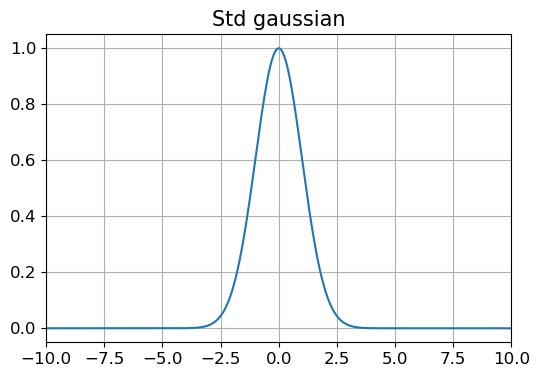

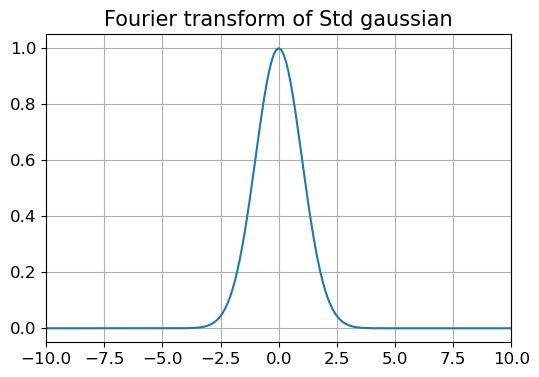

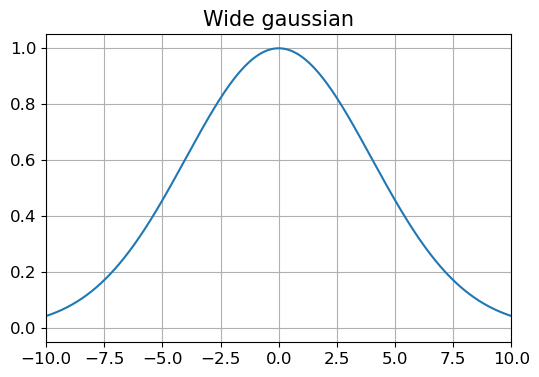

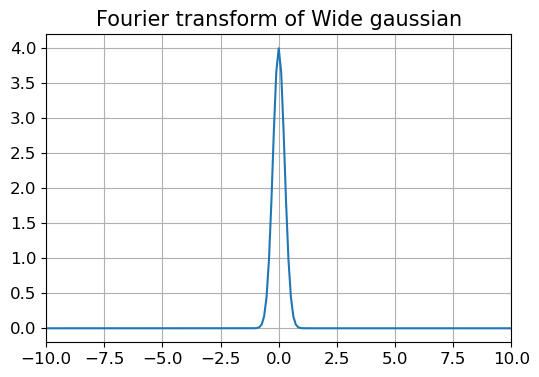

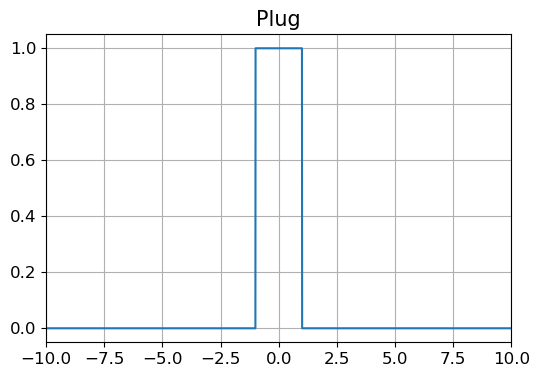

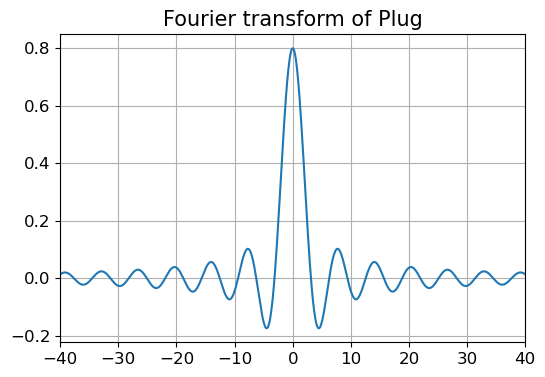

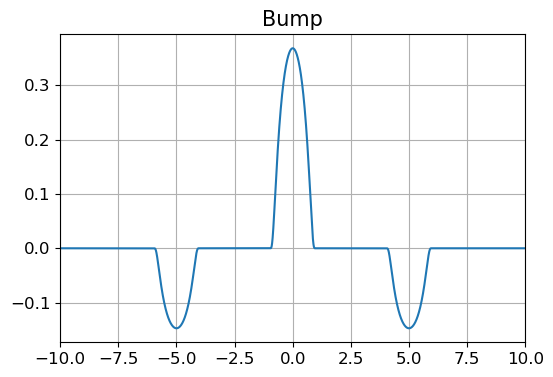

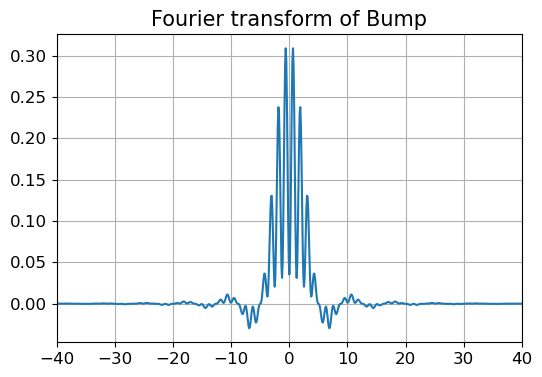

In [113]:
def gaussian(x, sigma):
    return np.exp(-x**2/(2*sigma**2))

def plug(x):
    return np.where(np.abs(x) < 1, 1, 0)

def bump(x):
    return np.where(np.abs(x) < 1, np.exp(-1/(1-x**2)), 0)

plot_fourier(lambda x: gaussian(x, 1), title='Std gaussian', kmax=10, xmax=10)
plot_fourier(lambda x: gaussian(x, 4), title='Wide gaussian', kmax=10, xmax=10)
plot_fourier(lambda x: plug(x), title='Plug', kmax=40, xmax=10)
plot_fourier(lambda x: bump(x) - 0.4*(bump(x-5) + bump(x+5)), title='Bump', kmax=40, xmax=10)
